### Problem 1 (5 points)

Nearly 1.8 million bachelor’s degrees and over 750,000 master’s degrees are awarded annually by U.S. postsecondary institutions (National Center for Education Statistics web- site, November, 2014). The department of Education tracks the field of study for these graduates in the following categories: Business (B), Computer Sciences and Engineering (CSE), Education (E), Humanities (H), Natural Sciences and Mathematics (NSM), Social and Behavioral Sciences (SBS), and Other (O).

Please read the data from "Majors.csv" and complete the following tasks. Make sure that "Majors.csv" is in your working directory. Pay attention to the format of the data and do not make any change to the data file.

In [1]:
# 1-1: Provide a percent frequency distribution of field of study for each degree

import csv

category = ['B', 'CSE', 'E', 'H', 'NSM', 'SBS', 'O']
Bachelor = []
Master = []

with open('Majors.csv') as f:
    reader = csv.reader(f)
    next(reader, None)               # Skip the header of Majors.csv
    
    for row in reader:                             
        Bachelor.append(row[0])            # Read 'Bachelor' column and append to list
        Master.append(row[1])              # Read 'Master' column and append to list

        
    print("Categories : ", category)
    B_Freq = [Bachelor.count(x) for x in category]
    M_Freq = [Master.count(x) for x in category]
    #print("Frequency distribution for Bachelor degree : ", B_Freq, sum(B_Freq))
    #print("Frequency distribution for Master degree : ", M_Freq, sum(M_Freq))
    
    percent_B_Freq = [(x/sum(B_Freq) * 100) for x in B_Freq]
    percent_M_Freq = [(x/sum(M_Freq) * 100) for x in M_Freq]                    
    
    print("Percent Frequency distribution for Bachelor degree : ", percent_B_Freq)
    print("Percent Frequency distribution for Master degree : ", percent_M_Freq)



Categories :  ['B', 'CSE', 'E', 'H', 'NSM', 'SBS', 'O']
Percent Frequency distribution for Bachelor degree :  [21.0, 9.0, 6.0, 16.0, 8.0, 16.0, 24.0]
Percent Frequency distribution for Master degree :  [27.0, 9.0, 24.0, 8.0, 2.0, 6.0, 24.0]


In [2]:
# 1-2: Use list comprehension to display the field of study's change in percentage from bachelor's to master's. (2 points)

#assuming its percentage change and not just the diffrence between percent frequency from bachelor to master degree as (y-x)
print("Percentage change from bachelors to masters degree with these field of studies " , category)
print([(y-x)/x * 100  for (x,y) in zip(percent_B_Freq,percent_M_Freq)])


Percentage change from bachelors to masters degree with these field of studies  ['B', 'CSE', 'E', 'H', 'NSM', 'SBS', 'O']
[28.57142857142857, 0.0, 300.0, -50.0, -75.0, -62.5, 0.0]


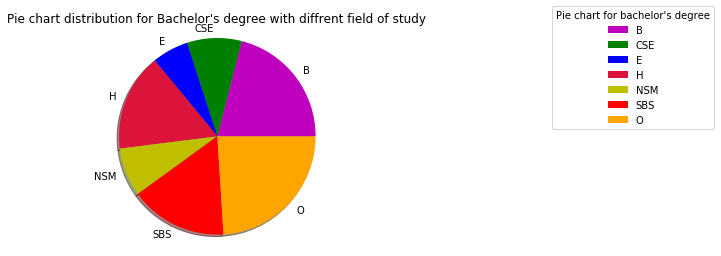

In [3]:
# 1-3: Construct a pie chart for field of study for bachelor's degree with proper label/title/legend.

import matplotlib.pyplot as plt
%matplotlib inline

color = ['m','g','b','crimson','y','r','orange']

plt.pie(percent_B_Freq,labels=category, colors=color, shadow=True, startangle=0, frame=False)
plt.legend(title="Pie chart for bachelor's degree", bbox_to_anchor=(1., 1.02, 1., .102))  
#loc = "upper left" - All values of "loc", plot the legend on pie chart
plt.title("Pie chart distribution for Bachelor's degree with diffrent field of study")
plt.axis('equal')
plt.show()

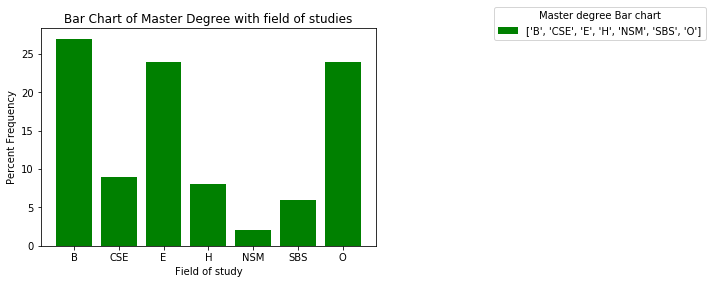

In [4]:
# 1-4: Construct a bar chart for field of study for master's degree with proper label/title/legend.

plt.bar((range(1, len(category)+1)), percent_M_Freq, color='g', align='center',label=category)
plt.xticks([x for x in range(1, len(category)+1)], category)
plt.ylabel('Percent Frequency')
plt.xlabel('Field of study')
plt.title('Bar Chart of Master Degree with field of studies')
plt.legend(title="Master degree Bar chart", bbox_to_anchor=(1., 1.02, 1., .102))  

### Problem 2 (10 points)
The 32 teams in the National Football League (NFL) are worth, on average, $1.17 billion, 5 percent more than last year. The data file "NFLTeamValue.csv" shows the annual revenue ($ millions) and the estimated team value ($ millions) for the 32 NFL teams (forbes website, February 28, 2014). 

Please read the data from "NFLTeamValue.csv" and complete the following tasks. Make sure that "NFLTeamValue.csv" is in your working directory. Pay attention to the format of the data and do not make any change to the data file.

Note: In total, there are 32 teams. Therefore, the data contains the entire population. Make sure you use appropriate formulars (for population, not for sample) when computing the values needed.

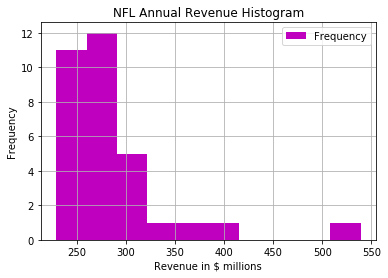

In [5]:
# 2-1: Develop and display a histogram for the annual revenue with proper label/title/legend. 
# Choose an appropriate value for the number of bins.

%matplotlib inline
import matplotlib.pyplot as plt

########### Read data from csv file ##########
Revenue = []
Current = []
Names = []

with open('NFLTeamValue.csv') as f:
    reader = csv.reader(f)
    next(reader, None)                                 #skip header
    
    for row in reader:
        Names.append(row[0])
        Revenue.append(int(row[1]))
        Current.append(int(row[2].replace(',','')))
        
    #print(Revenue)
    #print(Current)

######## Plot Histogram

plt.hist(Revenue, bins=10, normed=0, cumulative=0, color='m', label='Frequency')
plt.xlabel('Revenue in $ millions')
plt.ylabel('Frequency')
plt.legend()
plt.title('NFL Annual Revenue Histogram')

plt.grid(True)
plt.show() 

In [6]:
# 2-2: Compute and display the following information for the annual revenue: 
# mean, median, variance, standard deviation, 1st and 3rd quartile, 10th and 90th percentile and IQR.
# Don't simply print out a number. Make sure you clearly indicate what a number is. For example, "the mean of the annual revenue is"


from scipy import stats
import numpy as np
import math

#### Using Stats

rev_stats = stats.describe(Revenue)   
print("The Mean ($ millions) of the annual revenue  is : ", rev_stats.mean)
print("The Median ($ millions) of the annual revenue is : ", np.median(Revenue))
print("The Variance ($ millions) of the annual revenue is : ", np.var(Revenue))
print("The Standard Deviation ($ millions) of the estimated team value : ", np.std(Revenue))
print("The 1st quartile Q1 ($ millions) of the annual revenue is : ", np.percentile(Revenue, (25)))
print("The 3rd quartile Q3 ($ millions) of the annual revenue is : ", np.percentile(Revenue, (75)))
print("The 10th percentile of the annual revenue is : ", np.percentile(Revenue, (10)))
print("The 90th percentile of the annual revenue is : ", np.percentile(Revenue, (90)))
print("The IQR ($ millions) of the annual revenue : ", stats.iqr(Revenue))


The Mean ($ millions) of the annual revenue  is :  286.46875
The Median ($ millions) of the annual revenue is :  269.0
The Variance ($ millions) of the annual revenue is :  3586.49902344
The Standard Deviation ($ millions) of the estimated team value :  59.8873861797
The 1st quartile Q1 ($ millions) of the annual revenue is :  252.75
The 3rd quartile Q3 ($ millions) of the annual revenue is :  293.5
The 10th percentile of the annual revenue is :  245.3
The 90th percentile of the annual revenue is :  336.3
The IQR ($ millions) of the annual revenue :  40.75


In [7]:
# 2-3: Compute and display z-scores for Dallas Cowboys, Oakland Raiders, and Chicago Bears. (2 points)
# And then print out the team names of all outliers based on z-score. 
# Read the textbook if you don't know how to determine outliers based on z-score.

outliers_r = []
scores_r = stats.zscore(Revenue)
print("Zscores for Revenue of Dallas Cowboys, Oakland Raiders, and Chicago Bears as below")
print([(x,y) for (x,y) in zip(Names,scores_r) if x == "Dallas Cowboys" or x == "Oakland Raiders" or x=="Chicago Bears"])

outliers_r.append([(x) for (x,y) in zip(Names,scores_r) if y > 3 or y < -3])
print("\nOutliers(team names) based on z-score of Revenue : ", outliers_r)

outliers_c = []
scores_c = stats.zscore(Current)
print("\nZscores for Eastimated team value of Dallas Cowboys, Oakland Raiders, and Chicago Bears as below")
print([(x,y) for (x,y) in zip(Names,scores_c) if x == "Dallas Cowboys" or x == "Oakland Raiders" or x=="Chicago Bears"])

outliers_c.append([(x) for (x,y) in zip(Names,scores_c) if y > 3 or y < -3])
print("\nOutliers(team names) based on z-score of Estimated Team value : ", outliers_c)

Zscores for Revenue of Dallas Cowboys, Oakland Raiders, and Chicago Bears as below
[('Chicago Bears', 0.19254889444327045), ('Dallas Cowboys', 4.2167686070354158), ('Oakland Raiders', -0.95961359588394135)]

Outliers(team names) based on z-score of Revenue :  [['Dallas Cowboys']]

Zscores for Eastimated team value of Dallas Cowboys, Oakland Raiders, and Chicago Bears as below
[('Chicago Bears', 0.27772372957858166), ('Dallas Cowboys', 3.641300109191191), ('Oakland Raiders', -1.0927410739467849)]

Outliers(team names) based on z-score of Estimated Team value :  [['Dallas Cowboys']]


{'boxes': [<matplotlib.lines.Line2D at 0x1a12152940>],
 'caps': [<matplotlib.lines.Line2D at 0x1a121594a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a12160208>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a12159d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a12152ac8>,
  <matplotlib.lines.Line2D at 0x1a12159048>]}

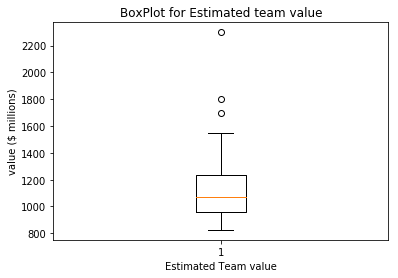

In [8]:
# 2-4: Develop and display a box for the estimated team value with proper label/title/legend.

plt.title("BoxPlot for Estimated team value")
plt.xlabel("Estimated Team value")
plt.ylabel("value ($ millions)")
#plt.legend()  not adding legend as only one box plot
plt.boxplot(Current)

In [9]:
# 2-5: Compute and display the following information for the estimated team value: 
# mean, median, variance, standard deviation, 1st and 3rd quartile, 10th and 90th percentile and IQR.

print("The Mean ($ millions) of the estimated team value : ", np.mean(Current))
print("The Median ($ millions) of the estimated team value : ", np.median(Current))
print("The Variance ($ millions) of the estimated team value : ", np.var(Current))
print("The Standard Deviation ($ millions) of the estimated team value : ", np.std(Current))
print("The 1st quartile (Q1) ($ millions) of the estimated team value : ", np.percentile(Current, (25)))
print("The 3rd quartile (Q3) ($ millions) of the estimated team value : ", np.percentile(Current, (75)))
print("The 10th percentile ($ millions) of the estimated team value : ", np.percentile(Current, (10)))
print("The 90th percentile ($ millions) of the estimated team value : ", np.percentile(Current, (90)))
print("The IQR ($ millions) of the estimated team value : ", stats.iqr(Current))


The Mean ($ millions) of the estimated team value :  1165.46875
The Median ($ millions) of the estimated team value :  1070.5
The Variance ($ millions) of the estimated team value :  97077.8115234
The Standard Deviation ($ millions) of the estimated team value :  311.573123879
The 1st quartile (Q1) ($ millions) of the estimated team value :  958.0
The 3rd quartile (Q3) ($ millions) of the estimated team value :  1233.25
The 10th percentile ($ millions) of the estimated team value :  877.5
The 90th percentile ($ millions) of the estimated team value :  1540.0
The IQR ($ millions) of the estimated team value :  275.25


In [10]:
# 2-6: Print out the team names of all outliers based on IQR. (2 points)
# Read the textbook if you don't know how to determine outliers based on IQR.

outliers = []
Q1,Q3 = np.percentile(Revenue, (25,75))
outliers.append([(x) for (x,y) in zip(Names,Revenue) if y > (Q3+1.5*stats.iqr(Revenue)) or y < (Q1 - 1.5*stats.iqr(Revenue))])
print("Outliers (team names) based on IQR of Revenue as : ", outliers)

outliers = []
Q1,Q3 = np.percentile(Current, (25,75))
outliers.append([(x) for (x,y) in zip(Names,Current) if y > (Q3+1.5*stats.iqr(Current)) or y < (Q1 - 1.5*stats.iqr(Current))])
print("\nOutliers (team names) based on IQR of Estimated team value as : ", outliers)

Outliers (team names) based on IQR of Revenue as :  [['Dallas Cowboys', 'New England Patriots', 'Washington Redskins']]

Outliers (team names) based on IQR of Estimated team value as :  [['Dallas Cowboys', 'New England Patriots', 'Washington Redskins']]


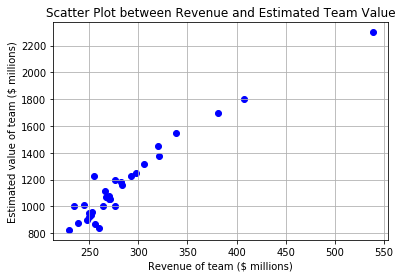

Relationship between Revenue and Team value - The Revenue of the team increases linearly with the estimated value of the team, therefore there is positive linear relationship between these two variables


In [11]:
# 2-7: Develop a scatter diagram with Revenue on the horizontal axis and value on the vertical axis. 
# Briefly describe the relationship between the two variables?

# Scatter Plot
plt.scatter(Revenue,Current, c='b', marker='o')
plt.xlabel('Revenue of team ($ millions)')
plt.ylabel('Estimated value of team ($ millions)')
plt.title('Scatter Plot between Revenue and Estimated Team Value')
plt.grid(True)
plt.show()

# Relationship
print("Relationship between Revenue and Team value - The Revenue of the team increases linearly with the estimated value of the team, therefore there is \
positive linear relationship between these two variables")

In [12]:
# 2-8: Compute and display the population covariance and correlation coefficient between the two variables.
# Briefly interpret the practical meaning of this correlation coefficient.

print("The population covariance between Revenue and team value is : \n", np.cov(Revenue, Current, bias=True))
print("\nThe correlation coefficient between Revenue and team value is : \n", np.corrcoef(Revenue, Current)[0][1])

print("\nThe value of correlation coefficient '0.963314823184' indicates that there is strong \
positive linear relationship between Revenue and estimated team value as the coefficient value is close to 1. That also means value for Revenue and team value increases together.")

The population covariance between Revenue and team value is : 
 [[  3586.49902344  17974.78027344]
 [ 17974.78027344  97077.81152344]]

The correlation coefficient between Revenue and team value is : 
 0.963314823184

The value of correlation coefficient '0.963314823184' indicates that there is strong positive linear relationship between Revenue and estimated team value as the coefficient value is close to 1. That also means value for Revenue and team value increases together.


### Problem 3 (5 points)

The data file "NBA.csv" contains information on 2763 NBA players from their rookie season. The data contain seven attributes: ID, FN, LN, isAllStar, DRAFT_YR, MPG, PPG. Make sure that "NBA.csv" is in your working directory. Pay attention to the format of the data and do not make any change to the data file.

Write a Python function find_rookie(a, b) here in this cell that takes two non-negative real numbers a and b as input. The function returns a list of all players whose PPG was at least a points per game and MPG is at least b minutes per game. Please use a list for each qualified player, including FN, LN, isAllStar, DRAFT_YR, MPG, and PPG. Therefore, eventually the function will return a list of list similar to the below:

[[FN1, LN1, isAllStar1, DRAFT_YR1, MPG1, PPG1], [FN2, LN3, isAllStar2, DRAFT_YR2, MPG2, PPG2]]


In [13]:
  # start your code below
import csv
def find_rookie(a, b):
    
    if(a<0 or b<0):
        return "Invalid input - Please pass non-negative numbers as input"
    else:
  
        mpg = []
        ppg = []
        names = []

        with open('NBA.csv') as f:
            reader = csv.reader(f)
            next(reader, None)              # skip the header

            for row in reader:
                if (float(row[5]) >= b) and (float(row[6]) >= a):
                    names.append(row[1:7])                    
        return names; 


#find_rookie(15, 28.9)
#find_rookie(22.1,37.2)
#find_rookie(27.1,37.2)
#find_rookie(15,0)
#print(len(find_rookie(27,37.2)))
#find_rookie(-1,34)

In [14]:
print(find_rookie(35, 35))
print()
print(find_rookie(40, 40))
print()
print(find_rookie(30, 30).pop())
print()
print(find_rookie(25, 38.3).pop())
print()
print(find_rookie(28.2, 35).pop())


[['Wilt', 'Chamberlain', '1', '1959', '46.4', '37.6']]

[]

['Walt', 'Bellamy', '1', '1961', '42.3', '31.6']

['Michael', 'Jordan', '1', '1984', '38.3', '28.2']

['Michael', 'Jordan', '1', '1984', '38.3', '28.2']
